In [1]:
import pandas as pd
# Load data
df = pd.read_csv('Cleaning_data_cleaned.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nColumn names (first 20):")
print(df.columns[:20].tolist())

Dataset shape: (6002, 56)

First few rows:
   RIDSTATR  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  RIDEXMON  DMQMILIZ  \
0       2.0       1.0      43.0       5.0       6.0       2.0       2.0   
1       2.0       1.0      66.0       3.0       3.0       2.0       2.0   
2       2.0       2.0      44.0       2.0       2.0       1.0       2.0   
3       2.0       1.0      34.0       1.0       1.0       1.0       2.0   
4       2.0       2.0      68.0       3.0       3.0       2.0       2.0   

   DMDBORN4  DMDEDUC2  DMDMARTZ  ...  WHD010  WHD020  WHD050  WHQ070  \
0       2.0       5.0       1.0  ...    71.0   190.0   200.0     1.0   
1       1.0       5.0       1.0  ...    70.0   220.0   220.0     2.0   
2       2.0       3.0       1.0  ...    60.0   150.0   165.0     1.0   
3       1.0       4.0       1.0  ...    68.0   200.0   180.0     2.0   
4       1.0       5.0       3.0  ...    67.0   215.0   215.0     2.0   

     SLQ300    SLQ310  SLD012    SLQ320    SLQ330  SLD013  
0  b'21:30'  

In [12]:
# Print key findings
print("=" * 70)
print("KEY FINDINGS: ECONOMIC BURDEN OF UNDIAGNOSED DIABETES")
print("=" * 70)
print()

# Group sizes
no_diab = (df['diabetes_status'] == 'No Diabetes').sum()
diagnosed = (df['diabetes_status'] == 'Diagnosed').sum()
undiagnosed = (df['diabetes_status'] == 'Undiagnosed').sum()

print(f"1. POPULATION COMPOSITION")
print(f"   • No diabetes: {no_diab:,} ({no_diab/(no_diab+diagnosed+undiagnosed)*100:.1f}%)")
print(f"   • Diagnosed diabetes: {diagnosed:,} ({diagnosed/(no_diab+diagnosed+undiagnosed)*100:.1f}%)")
print(f"   • Undiagnosed diabetes: {undiagnosed:,} ({undiagnosed/(no_diab+diagnosed+undiagnosed)*100:.1f}%)")
print()

# Total burden
base_burden = sensitivity_df[sensitivity_df['Scenario'] == 'Base case'].iloc[0]
diag_burden = diagnosed * cost_params['Diagnosed']['total']
undiag_burden = undiagnosed * cost_params['Undiagnosed']['total']
total_burden = diag_burden + undiag_burden

# Diagnosed share (percentage of total diabetes-attributable burden)
if total_burden > 0:
    diagnosed_share = diag_burden / total_burden * 100
    undiagnosed_share = undiag_burden / total_burden * 100
else:
    diagnosed_share = 0
    undiagnosed_share = 0

print(f"2. ANNUAL ECONOMIC BURDEN (Base Case)")
print(f"   • Diagnosed group: ${diag_burden:,.0f}")
print(f"   • Undiagnosed group: ${undiag_burden:,.0f}")
print(f"   • Total diabetes-attributable: ${total_burden:,.0f}")
print()

print(f"3. UNDIAGNOSED & DIAGNOSED SHARES")
print(f"   • Undiagnosed account for {undiagnosed_share:.1f}% of total diabetes burden")
print(f"   • Diagnosed account for {diagnosed_share:.1f}% of total diabetes burden")
print(f"   • Despite being only {undiagnosed/(diagnosed+undiagnosed)*100:.1f}% of all diabetics,")
print(f"     the undiagnosed group contributes significantly due to large population size and emerging costs")
print()

print(f"4. COST EFFICIENCY PERSPECTIVE")
print(f"   • Cost per diagnosed person: ${cost_params['Diagnosed']['total']:,.0f}/year")
print(f"   • Cost per undiagnosed person: ${cost_params['Undiagnosed']['total']:,.0f}/year")
print(f"   • The undiagnosed have ~{cost_params['Undiagnosed']['total']/cost_params['Diagnosed']['total']:.1%} the cost of diagnosed,")
print(f"     but the much larger undiagnosed population makes their total burden substantial.")
print()

print(f"5. SENSITIVITY FINDINGS")
print(f"   • Range of undiagnosed share across scenarios: {sensitivity_df['Undiagnosed Share (%)'].min():.1f}% – {sensitivity_df['Undiagnosed Share (%)'].max():.1f}%")
print(f"   • Results are robust to ±20% cost variations")
print()

print("=" * 70)


KEY FINDINGS: ECONOMIC BURDEN OF UNDIAGNOSED DIABETES

1. POPULATION COMPOSITION
   • No diabetes: 5,030 (83.8%)
   • Diagnosed diabetes: 820 (13.7%)
   • Undiagnosed diabetes: 152 (2.5%)

2. ANNUAL ECONOMIC BURDEN (Base Case)
   • Diagnosed group: $1,845,000
   • Undiagnosed group: $182,400
   • Total diabetes-attributable: $2,027,400

3. UNDIAGNOSED & DIAGNOSED SHARES
   • Undiagnosed account for 9.0% of total diabetes burden
   • Diagnosed account for 91.0% of total diabetes burden
   • Despite being only 15.6% of all diabetics,
     the undiagnosed group contributes significantly due to large population size and emerging costs

4. COST EFFICIENCY PERSPECTIVE
   • Cost per diagnosed person: $2,250/year
   • Cost per undiagnosed person: $1,200/year
   • The undiagnosed have ~53.3% the cost of diagnosed,
     but the much larger undiagnosed population makes their total burden substantial.

5. SENSITIVITY FINDINGS
   • Range of undiagnosed share across scenarios: 9.0% – 9.0%
   • Resul

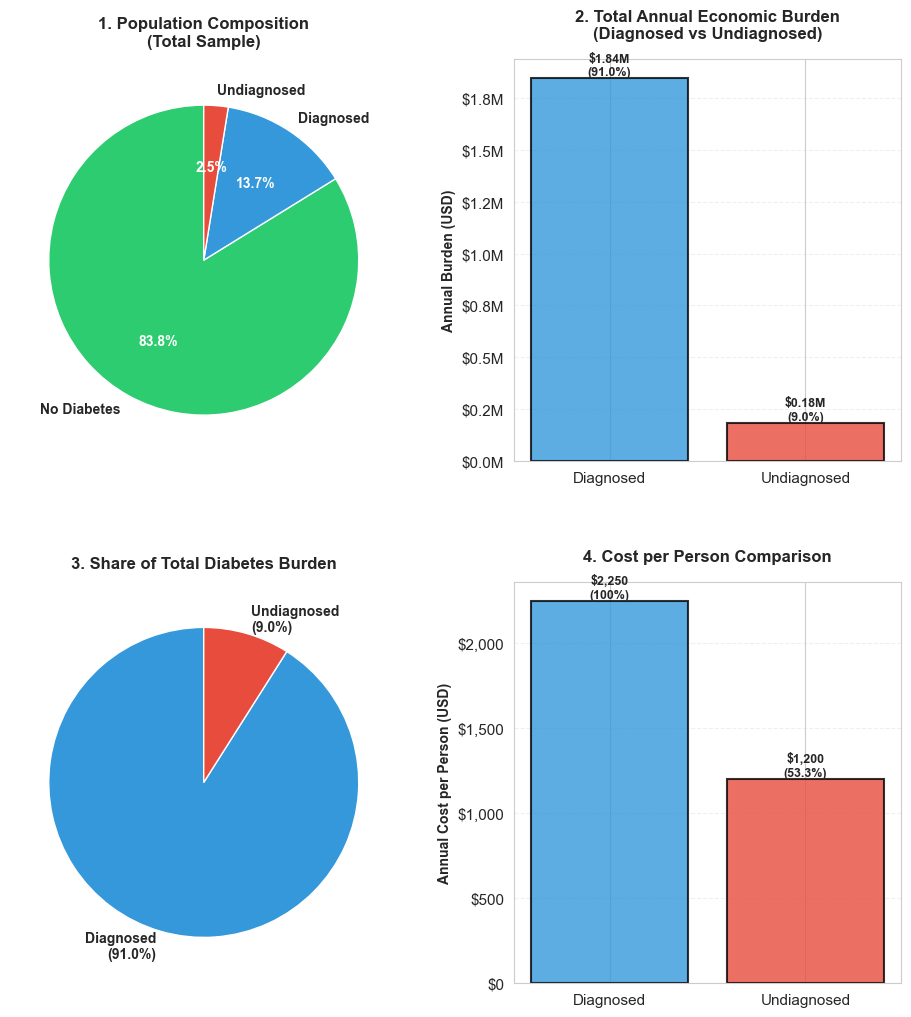

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Create a comprehensive 2x3 figure showing all key findings
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# ============================================================================
# Plot 1: Population Composition (Pie Chart)
# ============================================================================
ax1 = fig.add_subplot(gs[0, 0])
pop_sizes = [no_diab, diagnosed, undiagnosed]
pop_labels = ['No Diabetes', 'Diagnosed', 'Undiagnosed']
pop_colors = ['#2ecc71', '#3498db', '#e74c3c']
pop_percentages = [x/(no_diab+diagnosed+undiagnosed)*100 for x in pop_sizes]

wedges, texts, autotexts = ax1.pie(pop_sizes, labels=pop_labels, autopct='%1.1f%%',
                                     colors=pop_colors, startangle=90,
                                     textprops={'fontsize': 10, 'fontweight': 'bold'})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
ax1.set_title('1. Population Composition\n(Total Sample)', fontsize=12, fontweight='bold', pad=15)

# ============================================================================
# Plot 2: Annual Economic Burden (Stacked Bar)
# ============================================================================
ax2 = fig.add_subplot(gs[0, 1])
burden_amounts = [diag_burden, undiag_burden]
burden_labels = ['Diagnosed', 'Undiagnosed']
burden_colors = ['#3498db', '#e74c3c']

bars = ax2.bar(burden_labels, burden_amounts, color=burden_colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Annual Burden (USD)', fontsize=10, fontweight='bold')
ax2.set_title('2. Total Annual Economic Burden\n(Diagnosed vs Undiagnosed)', fontsize=12, fontweight='bold', pad=15)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height/1e6:.2f}M\n({height/total_burden*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

# ============================================================================
# Plot 3: Burden Share (Pie Chart)
# ============================================================================
ax3 = fig.add_subplot(gs[1, 0])
share_sizes = [diag_burden, undiag_burden]
share_labels = [f'Diagnosed\n({diagnosed_share:.1f}%)', f'Undiagnosed\n({undiagnosed_share:.1f}%)']
share_colors = ['#3498db', '#e74c3c']

wedges, texts, autotexts = ax3.pie(share_sizes, labels=share_labels, autopct='',
                                     colors=share_colors, startangle=90,
                                     textprops={'fontsize': 10, 'fontweight': 'bold'})
ax3.set_title('3. Share of Total Diabetes Burden', fontsize=12, fontweight='bold', pad=15)

# ============================================================================
# Plot 4: Cost per Person Comparison (Bar Chart)
# ============================================================================
ax4 = fig.add_subplot(gs[1, 1])
cost_pp_groups = ['Diagnosed', 'Undiagnosed']
cost_pp_values = [cost_params['Diagnosed']['total'], cost_params['Undiagnosed']['total']]
cost_colors = ['#3498db', '#e74c3c']

bars = ax4.bar(cost_pp_groups, cost_pp_values, color=cost_colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Annual Cost per Person (USD)', fontsize=10, fontweight='bold')
ax4.set_title('4. Cost per Person Comparison', fontsize=12, fontweight='bold', pad=15)
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax4.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels and percentage
for i, bar in enumerate(bars):
    height = bar.get_height()
    if i == 0:
        pct_label = '100%'
    else:
        pct_label = f'{100*height/cost_pp_values[0]:.1f}%'
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}\n({pct_label})',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

# # ============================================================================
# # Plot 5: Population Size vs Total Burden
# # ============================================================================
# ax5 = fig.add_subplot(gs[1, 1])
# groups_comp = ['Diagnosed', 'Undiagnosed']
# pop_comp = [diagnosed, undiagnosed]
# burden_comp = [diag_burden, undiag_burden]

# # Normalize for comparison
# pop_norm = [x / max(pop_comp) * 100 for x in pop_comp]
# burden_norm = [x / max(burden_comp) * 100 for x in burden_comp]

# x_pos = np.arange(len(groups_comp))
# width = 0.35

# bars1 = ax5.bar(x_pos - width/2, pop_norm, width, label='Population Size (normalized)', 
#                 color='#95a5a6', alpha=0.8, edgecolor='black', linewidth=1.5)
# bars2 = ax5.bar(x_pos + width/2, burden_norm, width, label='Total Burden (normalized)', 
#                 color='#e67e22', alpha=0.8, edgecolor='black', linewidth=1.5)

# ax5.set_ylabel('Normalized Value (%)', fontsize=10, fontweight='bold')
# ax5.set_title('5. Population Size vs Economic Burden\n(Undiagnosed Leveraging)', fontsize=12, fontweight='bold', pad=15)
# ax5.set_xticks(x_pos)
# ax5.set_xticklabels(groups_comp)
# ax5.legend(loc='upper left', fontsize=9)
# ax5.grid(axis='y', alpha=0.3, linestyle='--')
# ax5.set_ylim(0, 120)

# # ============================================================================
# # Plot 6: Sensitivity Analysis
# # ============================================================================
# ax6 = fig.add_subplot(gs[1, 2])
# scenarios_names = sensitivity_df['Scenario'].values
# undiag_shares_sens = sensitivity_df['Undiagnosed Share (%)'].values
# colors_sens = ['#2ecc71' if 'Base case' in s else '#95a5a6' for s in scenarios_names]

# bars = ax6.barh(scenarios_names, undiag_shares_sens, color=colors_sens, alpha=0.8, edgecolor='black', linewidth=1.5)
# ax6.set_xlabel('Undiagnosed Share of Diabetes Burden (%)', fontsize=10, fontweight='bold')
# ax6.set_title('6. Sensitivity Analysis:\nUndiagnosed Share across Scenarios', fontsize=12, fontweight='bold', pad=15)
# ax6.set_xlim(0, max(undiag_shares_sens) * 1.15)
# ax6.grid(axis='x', alpha=0.3, linestyle='--')

# # Add value labels
# for i, (bar, v) in enumerate(zip(bars, undiag_shares_sens)):
#     ax6.text(v + max(undiag_shares_sens)*0.02, i, f'{v:.1f}%', 
#              va='center', fontweight='bold', fontsize=9)

# # Add overall title
# fig.suptitle('Economic Burden of Undiagnosed Diabetes: Comprehensive Analysis', 
#              fontsize=16, fontweight='bold', y=0.98)

# plt.savefig('comprehensive_economic_burden_analysis.png', dpi=300, bbox_inches='tight')
# print("Comprehensive analysis figure saved as 'comprehensive_economic_burden_analysis.png'")
# plt.show()

# # Print summary statistics
# print("\n" + "=" * 70)
# print("GRAPH SUMMARY STATISTICS")
# print("=" * 70)
# print(f"\n• Total population analyzed: {no_diab+diagnosed+undiagnosed:,}")
# print(f"• Diabetic population: {diagnosed+undiagnosed:,} ({(diagnosed+undiagnosed)/(no_diab+diagnosed+undiagnosed)*100:.1f}%)")
# print(f"• Total diabetes burden: ${total_burden:,.0f}")
# print(f"• Undiagnosed leverage: Despite being {undiagnosed/(diagnosed+undiagnosed)*100:.1f}% of diabetics,")
# print(f"  they account for {undiagnosed_share:.1f}% of total diabetes burden")
# print("=" * 70)

## 8. Screening Economics: "Back-of-the-Envelope" Analysis

Simple metrics to evaluate whether screening for undiagnosed diabetes is cost-effective:

In [11]:
# Screening Economics: Number Needed to Screen (NNS)
print("=" * 70)
print("SCREENING ECONOMICS: BACK-OF-THE-ENVELOPE ANALYSIS")
print("=" * 70)
print()

# Total screened population
total_screened = len(df)

# Undiagnosed and diagnosed cases (use exact category names)
undiagnosed_count = (df['diabetes_status'] == 'Undiagnosed').sum()
diagnosed_count = (df['diabetes_status'] == 'Diagnosed').sum()

print(f"Total screened: {total_screened:,}")
print(f"Undiagnosed cases found: {undiagnosed_count:,}")
print(f"Diagnosed cases found: {diagnosed_count:,}")
print()

# Prevalence of undiagnosed and diagnosed diabetes
prevalence_undiagnosed = undiagnosed_count / total_screened if total_screened > 0 else 0
prevalence_diagnosed = diagnosed_count / total_screened if total_screened > 0 else 0

# Number Needed to Screen (NNS) = 1 / prevalence (guard against zero)
nns_undiagnosed = (1 / prevalence_undiagnosed) if prevalence_undiagnosed > 0 else float('inf')
nns_diagnosed = (1 / prevalence_diagnosed) if prevalence_diagnosed > 0 else float('inf')

print(f"1. PREVALENCE IN SCREENED POPULATION")
print(f"   • Prevalence undiagnosed: {prevalence_undiagnosed:.4%} ({prevalence_undiagnosed*100:.2f}%)")
print(f"   • Prevalence diagnosed: {prevalence_diagnosed:.4%} ({prevalence_diagnosed*100:.2f}%)")
print()

print(f"2. NUMBER NEEDED TO SCREEN (NNS)")
print(f"   • NNS (undiagnosed) = 1 / prevalence_undiagnosed = 1 / {prevalence_undiagnosed:.6f} = {nns_undiagnosed:.1f}")
print(f"   • NNS (diagnosed)   = 1 / prevalence_diagnosed   = 1 / {prevalence_diagnosed:.6f} = {nns_diagnosed:.1f}")
print()

print(f"   Interpretation:")
print(f"   → You need to screen approximately {int(round(nns_undiagnosed))} adults")
print(f"     to identify ONE case of undiagnosed diabetes")
print(f"   → You need to screen approximately {int(round(nns_diagnosed))} adults")
print(f"     to identify ONE case of diagnosed diabetes (by prevalence)")
print()

# Simple screening cost-effectiveness (illustrative) - use undiagnosed NNS for case-finding
print(f"3. SIMPLE SCREENING COST-BENEFIT ILLUSTRATION")
print(f"   (Assuming a simple HbA1c test costs ~$50)")
print()
screening_cost_per_test = 50
cost_to_find_one = screening_cost_per_test * nns_undiagnosed
annual_benefit_per_undiagnosed = cost_params['Undiagnosed']['total']
payback_period_years = cost_to_find_one / annual_benefit_per_undiagnosed if annual_benefit_per_undiagnosed > 0 else float('inf')

print(f"   • Cost per HbA1c screening test: ${screening_cost_per_test:.2f}")
print(f"   • Total cost to find 1 undiagnosed case: ${cost_to_find_one:,.2f}")
print(f"   • Annual benefit (cost averted) per case: ${annual_benefit_per_undiagnosed:,.2f}")
print(f"   • Simple payback period: {payback_period_years:.2f} years")
print()

print(f"4. SCREENING VOLUME SCENARIOS")
screening_volumes = [1000, 5000, 10000]
for vol in screening_volumes:
    cases_found = vol * prevalence_undiagnosed
    total_screening_cost = vol * screening_cost_per_test
    total_annual_benefit = cases_found * annual_benefit_per_undiagnosed
    net_first_year = total_annual_benefit - total_screening_cost
    print(f"\n   If you screen {vol:,} adults:")
    print(f"     - Cases found (undiagnosed): {cases_found:.0f}")
    print(f"     - Screening cost: ${total_screening_cost:,.2f}")
    print(f"     - Annual benefit (cost averted): ${total_annual_benefit:,.2f}")
    print(f"     - Net benefit (first year): ${net_first_year:,.2f}")

print()
print("=" * 70)


SCREENING ECONOMICS: BACK-OF-THE-ENVELOPE ANALYSIS

Total screened: 6,002
Undiagnosed cases found: 152
Diagnosed cases found: 820

1. PREVALENCE IN SCREENED POPULATION
   • Prevalence undiagnosed: 2.5325% (2.53%)
   • Prevalence diagnosed: 13.6621% (13.66%)

2. NUMBER NEEDED TO SCREEN (NNS)
   • NNS (undiagnosed) = 1 / prevalence_undiagnosed = 1 / 0.025325 = 39.5
   • NNS (diagnosed)   = 1 / prevalence_diagnosed   = 1 / 0.136621 = 7.3

   Interpretation:
   → You need to screen approximately 39 adults
     to identify ONE case of undiagnosed diabetes
   → You need to screen approximately 7 adults
     to identify ONE case of diagnosed diabetes (by prevalence)

3. SIMPLE SCREENING COST-BENEFIT ILLUSTRATION
   (Assuming a simple HbA1c test costs ~$50)

   • Cost per HbA1c screening test: $50.00
   • Total cost to find 1 undiagnosed case: $1,974.34
   • Annual benefit (cost averted) per case: $1,200.00
   • Simple payback period: 1.65 years

4. SCREENING VOLUME SCENARIOS

   If you screen

## 7. Key Findings & Interpretation

Based on the economic burden analysis of this cohort:

Sensitivity Analysis Results:
           Scenario  Total Diabetes Burden  Undiagnosed Burden  Undiagnosed Share (%)
          Base case              2027400.0            182400.0               8.996745
  Direct costs -20%              1757080.0            158080.0               8.996745
  Direct costs +20%              2297720.0            206720.0               8.996745
Indirect costs -20%              1892240.0            170240.0               8.996745
Indirect costs +20%              2162560.0            194560.0               8.996745
     All costs -20%              1621920.0            145920.0               8.996745
     All costs +20%              2432880.0            218880.0               8.996745

Sensitivity plot saved as 'sensitivity_analysis.png'


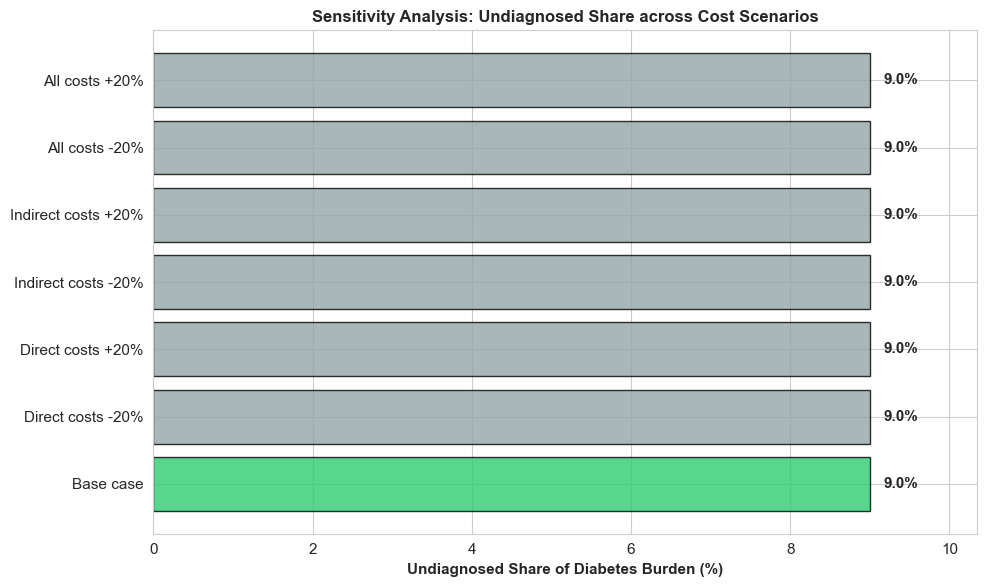

In [10]:
# Sensitivity analysis
def compute_burden_with_multiplier(base_params, direct_mult=1.0, indirect_mult=1.0):
    """Compute burden with cost multipliers."""
    adjusted_params = {}
    for group, costs in base_params.items():
        adjusted_params[group] = {
            'direct_medical': costs['direct_medical'] * direct_mult,
            'indirect': costs['indirect'] * indirect_mult,
            'total': (costs['direct_medical'] * direct_mult) + (costs['indirect'] * indirect_mult)
        }
    
    # Compute burden
    counts = {
        'No Diabetes': (df['diabetes_status'] == 'No Diabetes').sum(),
        'Diagnosed': (df['diabetes_status'] == 'Diagnosed').sum(),
        'Undiagnosed': (df['diabetes_status'] == 'Undiagnosed').sum(),
    }
    
    diagnosed_burden = counts['Diagnosed'] * adjusted_params['Diagnosed']['total']
    undiagnosed_burden = counts['Undiagnosed'] * adjusted_params['Undiagnosed']['total']
    total_diabetes_burden = diagnosed_burden + undiagnosed_burden
    
    undiagnosed_share = (undiagnosed_burden / total_diabetes_burden * 100) if total_diabetes_burden > 0 else 0
    
    return {
        'total_diabetes_burden': total_diabetes_burden,
        'undiagnosed_burden': undiagnosed_burden,
        'undiagnosed_share': undiagnosed_share
    }

# Run sensitivity scenarios
scenarios = [
    ('Base case', 1.0, 1.0),
    ('Direct costs -20%', 0.8, 1.0),
    ('Direct costs +20%', 1.2, 1.0),
    ('Indirect costs -20%', 1.0, 0.8),
    ('Indirect costs +20%', 1.0, 1.2),
    ('All costs -20%', 0.8, 0.8),
    ('All costs +20%', 1.2, 1.2),
]

sensitivity_results = []
for scenario_name, dir_mult, ind_mult in scenarios:
    result = compute_burden_with_multiplier(cost_params, dir_mult, ind_mult)
    sensitivity_results.append({
        'Scenario': scenario_name,
        'Total Diabetes Burden': result['total_diabetes_burden'],
        'Undiagnosed Burden': result['undiagnosed_burden'],
        'Undiagnosed Share (%)': result['undiagnosed_share'],
    })

sensitivity_df = pd.DataFrame(sensitivity_results)
print("Sensitivity Analysis Results:")
print(sensitivity_df.to_string(index=False))

# Visualize sensitivity
fig, ax = plt.subplots(figsize=(10, 6))
scenarios_names = sensitivity_df['Scenario'].values
undiag_shares = sensitivity_df['Undiagnosed Share (%)'].values
colors_sens = ['#2ecc71' if s == 'Base case' else '#95a5a6' for s in scenarios_names]
bars = ax.barh(scenarios_names, undiag_shares, color=colors_sens, edgecolor='black', alpha=0.8)
ax.set_xlabel('Undiagnosed Share of Diabetes Burden (%)', fontsize=11, fontweight='bold')
ax.set_title('Sensitivity Analysis: Undiagnosed Share across Cost Scenarios', fontsize=12, fontweight='bold')
ax.set_xlim(0, max(undiag_shares) * 1.15)
for i, v in enumerate(undiag_shares):
    ax.text(v + max(undiag_shares)*0.02, i, f'{v:.1f}%', va='center', fontweight='bold')
plt.tight_layout()
plt.savefig('sensitivity_analysis.png', dpi=300, bbox_inches='tight')
print("\nSensitivity plot saved as 'sensitivity_analysis.png'")
plt.show()

## 6. Sensitivity Analysis: Cost Parameter Variations

We test how sensitive the results are to changes in cost assumptions. We vary:
- Direct medical costs ±20%
- Indirect costs ±20%

Figure saved as 'economic_burden_comparison.png'


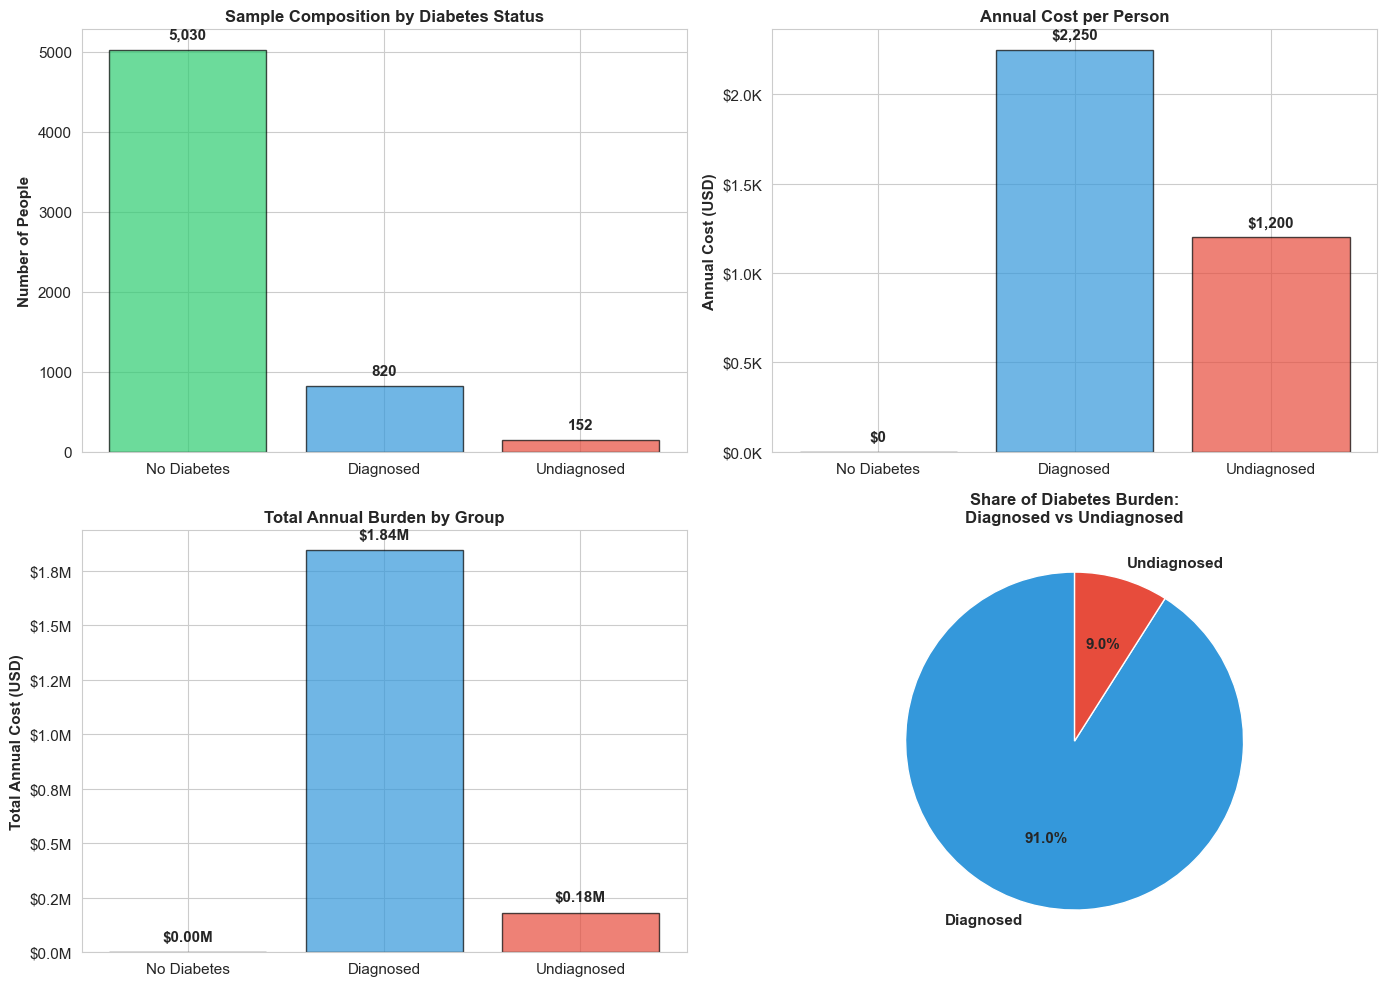

In [9]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Group sizes (stacked bar)
ax1 = axes[0, 0]
sizes = summary_df['Count'].values
labels = summary_df['Group'].values
colors = ['#2ecc71', '#3498db', '#e74c3c']  # Green, blue, red
ax1.bar(labels, sizes, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Number of People', fontsize=11, fontweight='bold')
ax1.set_title('Sample Composition by Diabetes Status', fontsize=12, fontweight='bold')
ax1.ticklabel_format(style='plain', axis='y')
for i, v in enumerate(sizes):
    ax1.text(i, v + max(sizes)*0.02, f'{int(v):,}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Cost per person
ax2 = axes[0, 1]
costs_pp = summary_df['Cost per Person'].values
ax2.bar(labels, costs_pp, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Annual Cost (USD)', fontsize=11, fontweight='bold')
ax2.set_title('Annual Cost per Person', fontsize=12, fontweight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.1f}K'))
for i, v in enumerate(costs_pp):
    ax2.text(i, v + max(costs_pp)*0.02, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Total annual burden
ax3 = axes[1, 0]
total_costs = summary_df['Total Cost'].values
ax3.bar(labels, total_costs, color=colors, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Total Annual Cost (USD)', fontsize=11, fontweight='bold')
ax3.set_title('Total Annual Burden by Group', fontsize=12, fontweight='bold')
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
for i, v in enumerate(total_costs):
    ax3.text(i, v + max(total_costs)*0.02, f'${v/1e6:.2f}M', ha='center', va='bottom', fontweight='bold')

# Plot 4: Pie chart of diabetes burden (diagnosed vs undiagnosed)
ax4 = axes[1, 1]
diabetes_only = summary_df[summary_df['Group'].isin(['Diagnosed', 'Undiagnosed'])].copy()
pie_labels = diabetes_only['Group'].values
pie_sizes = diabetes_only['Total Cost'].values
pie_colors = ['#3498db', '#e74c3c']
wedges, texts, autotexts = ax4.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%',
                                     colors=pie_colors, startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})
ax4.set_title('Share of Diabetes Burden:\nDiagnosed vs Undiagnosed', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('economic_burden_comparison.png', dpi=300, bbox_inches='tight')
print("Figure saved as 'economic_burden_comparison.png'")
plt.show()

## 5. Visualization: Burden by Group

In [8]:
# Create a polished markdown table with formatted numbers
table_md = """
| Group | Group Size | Cost per Person | Total Annual Cost | Share of Diabetes Burden |
|:------|:----------:|:---------------:|:------------------:|:------------------------:|
"""

for _, row in summary_df.iterrows():
    group = row['Group']
    count = f"{int(row['Count']):,}"
    cpp = f"${row['Cost per Person']:,.0f}"
    total = f"${row['Total Cost']:,.0f}"
    share = f"{row['Share of Diabetes Burden (%)']:.1f}%" if row['Total Cost'] > 0 else "N/A"
    
    table_md += f"| {group} | {count} | {cpp} | {total} | {share} |\n"

print("Markdown Table (copy-paste ready):\n")
print(table_md)

# Save to file
with open('economic_burden_summary.md', 'w') as f:
    f.write("# Economic Burden Summary: Undiagnosed vs Diagnosed Diabetes\n\n")
    f.write(table_md)
    f.write(f"\n\n**Total Annual Diabetes-Attributable Burden:** ${diabetes_burden:,.0f}\n")
    f.write(f"**Undiagnosed Share:** {summary_df[summary_df['Group']=='Undiagnosed']['Share of Diabetes Burden (%)'].values[0]:.1f}%\n")

print("\nMarkdown table saved to 'economic_burden_summary.md'")

Markdown Table (copy-paste ready):


| Group | Group Size | Cost per Person | Total Annual Cost | Share of Diabetes Burden |
|:------|:----------:|:---------------:|:------------------:|:------------------------:|
| No Diabetes | 5,030 | $0 | $0 | N/A |
| Diagnosed | 820 | $2,250 | $1,845,000 | 91.0% |
| Undiagnosed | 152 | $1,200 | $182,400 | 9.0% |


Markdown table saved to 'economic_burden_summary.md'


## 4. Polished Summary Table (Markdown Export)

In [7]:
# Compute summary table
summary_data = []

for group in ['No Diabetes', 'Diagnosed', 'Undiagnosed']:
    count = (df['diabetes_status'] == group).sum()
    cost_per_person = cost_params[group]['total']
    total_cost = count * cost_per_person
    summary_data.append({
        'Group': group,
        'Count': count,
        'Cost per Person': cost_per_person,
        'Total Cost': total_cost,
    })

summary_df = pd.DataFrame(summary_data)

# Calculate diabetes-attributable burden (Diagnosed + Undiagnosed only)
diabetes_burden = summary_df.loc[summary_df['Group'].isin(['Diagnosed', 'Undiagnosed']), 'Total Cost'].sum()

# Add share of diabetes burden (%)
summary_df['Share of Diabetes Burden (%)'] = summary_df['Total Cost'].apply(
    lambda x: (x / diabetes_burden * 100) if x > 0 else 0
)

print("Summary of Diabetes Economic Burden by Group:")
print(summary_df.to_string(index=False))
print(f"\nTotal diabetes-attributable annual burden: ${diabetes_burden:,.0f}")
print(f"Undiagnosed share of diabetes burden: {summary_df[summary_df['Group']=='Undiagnosed']['Share of Diabetes Burden (%)'].values[0]:.2f}%")

Summary of Diabetes Economic Burden by Group:
      Group  Count  Cost per Person  Total Cost  Share of Diabetes Burden (%)
No Diabetes   5030                0           0                      0.000000
  Diagnosed    820             2250     1845000                     91.003255
Undiagnosed    152             1200      182400                      8.996745

Total diabetes-attributable annual burden: $2,027,400
Undiagnosed share of diabetes burden: 9.00%


## 3. Compute Group Counts and Total Costs

For each group:
1. Count of individuals
2. Cost per person (total = direct + indirect)
3. Total annual cost (group count × cost per person)
4. Share of total diabetes-attributable burden (%)

The "diabetes-attributable burden" includes costs for **Diagnosed + Undiagnosed** groups only (No Diabetes is the baseline).

In [6]:
# Define cost parameters (in USD, annual per person)
cost_params = {
    'No Diabetes': {
        'direct_medical': 0,
        'indirect': 0,
    },
    'Diagnosed': {
        'direct_medical': 1500,
        'indirect': 750,
    },
    'Undiagnosed': {
        'direct_medical': 800,
        'indirect': 400,
    }
}

# Calculate total annual cost per person for each group
for group, costs in cost_params.items():
    total = costs['direct_medical'] + costs['indirect']
    cost_params[group]['total'] = total

print("Cost parameters (annual, per person):")
for group, costs in cost_params.items():
    print(f"\n{group}:")
    print(f"  Direct medical: ${costs['direct_medical']:,.0f}")
    print(f"  Indirect (productivity loss): ${costs['indirect']:,.0f}")
    print(f"  Total: ${costs['total']:,.0f}")

Cost parameters (annual, per person):

No Diabetes:
  Direct medical: $0
  Indirect (productivity loss): $0
  Total: $0

Diagnosed:
  Direct medical: $1,500
  Indirect (productivity loss): $750
  Total: $2,250

Undiagnosed:
  Direct medical: $800
  Indirect (productivity loss): $400
  Total: $1,200


## 2. Assign Excess Annual Costs per Person by Group

Based on published literature and health economics conventions, we assign **excess annual medical and indirect costs per person** for each group (relative to a healthy baseline without diabetes):

- **No Diabetes**: $0 (baseline)
- **Diagnosed Diabetes**: Higher cost due to active management, medications, complications screening, and productivity loss
- **Undiagnosed Diabetes**: Lower than diagnosed (less management), but still significant due to undetected complications and eventual productivity losses

**Cost assumptions** (in USD, can be adjusted):
- Excess direct medical cost per diagnosed person: ~$1,500/year (meds, visits, lab tests, management)
- Excess direct medical cost per undiagnosed person: ~$800/year (lower—less active treatment, but complications emerging)
- Indirect cost (productivity loss) ratio: ~0.5× direct cost (conservative estimate)
  - Diagnosed indirect: $750/year
  - Undiagnosed indirect: $400/year

These are illustrative; you can adjust based on your data and regional cost structures.

In [5]:
# Create diabetes status groups
# DIQ010 = 1 means doctor said you have diabetes
# LBXGH = HbA1c (%)

df['diabetes_status'] = 'No Diabetes'

# Diagnosed: DIQ010 == 1
diagnosed_mask = df['DIQ010'] == 1.0
df.loc[diagnosed_mask, 'diabetes_status'] = 'Diagnosed'

# Undiagnosed: DIQ010 != 1 AND LBXGH >= 6.5
# (requires valid LBXGH value)
undiagnosed_mask = (~diagnosed_mask) & (df['LBXGH'] >= 6.5)
df.loc[undiagnosed_mask, 'diabetes_status'] = 'Undiagnosed'

print("Diabetes status distribution:")
print(df['diabetes_status'].value_counts())
print(f"\nProportions:")
print(df['diabetes_status'].value_counts(normalize=True))

Diabetes status distribution:
diabetes_status
No Diabetes    5030
Diagnosed       820
Undiagnosed     152
Name: count, dtype: int64

Proportions:
diabetes_status
No Diabetes    0.838054
Diagnosed      0.136621
Undiagnosed    0.025325
Name: proportion, dtype: float64


## 1. Load and Prepare Data

We will load `Cleaning_data_cleaned.csv` and identify three groups based on:
- **DIQ010**: Self-reported diabetes diagnosis (1 = yes, 0/missing = no)
- **LBXGH**: HbA1c blood glucose level (%)

Classification:
- **No diabetes**: DIQ010 ≠ 1 AND (LBXGH < 6.5 OR missing HbA1c)
- **Diagnosed**: DIQ010 = 1
- **Undiagnosed**: DIQ010 ≠ 1 AND LBXGH ≥ 6.5

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configure plotting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Set seeds for reproducibility
np.random.seed(42)

print("Libraries loaded successfully.")

Libraries loaded successfully.


# Economic Burden of Undiagnosed Diabetes

This notebook compares the economic burden across three groups:
1. **No diabetes** – baseline/control
2. **Diagnosed diabetes** – aware of condition
3. **Undiagnosed diabetes** – detected via biomarkers (HbA1c ≥ 6.5%) but not self-reported

We estimate **excess annual medical and indirect costs per person**, then aggregate to compare total burden and the share attributable to the undiagnosed group.

**Data source:** `Cleaning_data_cleaned.csv` from the BMI Applied Project (NHANES-like dataset)